# Estudo de caso - k-Means

Descrição das features da base de dados:

* Apps Number of applications received
* Accept Number of applications accepted
* Enroll Number of new students enrolled
* Top10perc Pct. new students from top 10% of H.S. class
* Top25perc Pct. new students from top 25% of H.S. class
* F.Undergrad Number of fulltime undergraduates
* P.Undergrad Number of parttime undergraduates
* Outstate Out-of-state tuition
* Room.Board Room and board costs
* Books Estimated book costs
* Personal Estimated personal spending
* PhD Pct. of faculty with Ph.D.’s
* Terminal Pct. of faculty with terminal degree
* S.F.Ratio Student/faculty ratio
* perc.alumni Pct. alumni who donate
* Expend Instructional expenditure per student
* Grad.Rate Graduation rate

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Base de dados
**collegedata.xlsx**

In [2]:
df = pd.read_excel('collegedata.xlsx', index_col = 0)

In [3]:
df.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Name,,,,,,,,,,,,,,,,,
Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


## k-Means Clusters

In [4]:
from sklearn.cluster import KMeans

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Text(0, 0.5, 'Função Elbow')

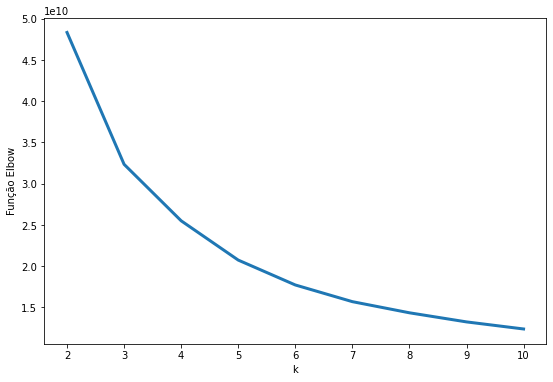

In [5]:
clusters = 11
k = np.zeros(clusters)
elbow_value = np.zeros(clusters)

for i in range(2, clusters):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    k[i] = i
    elbow_value[i] = kmeans.inertia_

plt.figure(figsize=(9, 6))
plt.plot(k[2:],elbow_value[2:],linewidth=3.0)
plt.xlabel('k')
plt.ylabel('Função Elbow')

## k-Means para k=3

In [6]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
print('Coordenadas dos centróides dos clusters =', kmeans.cluster_centers_)
print('')
print('Labels dos clusters =', kmeans.labels_)

Coordenadas dos centróides dos clusters = [[1.06216145e+04 7.30063855e+03 2.93942169e+03 3.20000000e+01
  6.34698795e+01 1.54825060e+04 3.17455422e+03 8.23585542e+03
  4.13487952e+03 5.94349398e+02 1.88833735e+03 8.41566265e+01
  8.95542169e+01 1.64072289e+01 1.58072289e+01 9.44095181e+03
  6.05060241e+01]
 [1.69801950e+03 1.23264007e+03 4.91457447e+02 2.18421986e+01
  4.98031915e+01 2.22833688e+03 6.57171986e+02 9.28175887e+03
  4.14247163e+03 5.36904255e+02 1.33126773e+03 6.76595745e+01
  7.51932624e+01 1.46368794e+01 2.09290780e+01 7.83098404e+03
  6.27092199e+01]
 [3.79185271e+03 2.04663566e+03 6.53937984e+02 4.98372093e+01
  7.72248062e+01 2.57355039e+03 2.35829457e+02 1.69343256e+04
  5.43727907e+03 5.74604651e+02 1.03575194e+03 8.75193798e+01
  9.33333333e+01 1.02046512e+01 3.51627907e+01 1.78138140e+04
  8.02868217e+01]]

Labels dos clusters = [1 1 1 2 1 1 1 1 2 1 2 2 1 1 1 1 2 1 1 1 2 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 2
 2 1 0 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 1 2 1 1 

In [7]:
df['Clusters'] = kmeans.labels_

In [8]:
df.head(25)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Clusters
Name,,,,,,,,,,,,,,,,,,
Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,2
Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1
Albertson College,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55,1
Albertus Magnus College,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63,1
Albion College,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73,1
Albright College,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80,2
